# Intermediate Visualization

## Read dataset

In [1]:
import pandas as pd
df_churning = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/BankChurners.csv', delimiter=',')
df_churning.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [2]:
df_churning.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [4]:
existing_data = df_churning[(df_churning.Attrition_Flag == 'Existing Customer')]
attrited_data = df_churning[(df_churning.Attrition_Flag == 'Attrited Customer')]

## Single plot

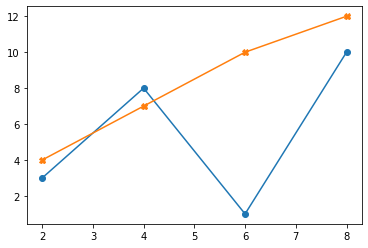

In [8]:
# secara default fungsi plot() akan menampilkan garis

import matplotlib.pyplot as plt
import numpy as np

x = np.array([2, 4, 6, 8])

y1 = np.array([3, 8, 1, 10])
y2 = np.array([4, 7, 10, 12])

plt.plot(x, y1, marker = 'o')
plt.plot(x, y2, marker = 'X')


plt.show()

### pie chart

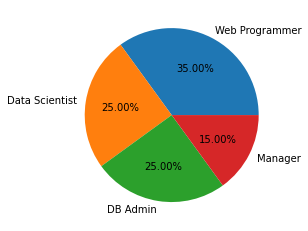

In [9]:
# contoh dengan data manual
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Web Programmer", "Data Scientist", "DB Admin", "Manager"]

plt.pie(y, labels = mylabels, autopct='%.2f%%')
plt.show()

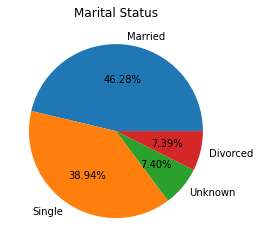

In [17]:
# versi 1. contoh menggunakan fungsi pie dari plt
import matplotlib.pyplot as plt

data = df_churning['Marital_Status'].value_counts()
label = data.index

plt.pie(data, labels=label, autopct='%.2f%%')
#plt.legend(loc='upper left')
plt.title('Marital Status')
plt.show() 

In [16]:
data = df_churning['Marital_Status'].value_counts()
data.index

Index(['Married', 'Single', 'Unknown', 'Divorced'], dtype='object')

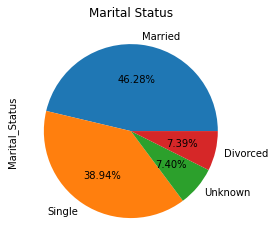

In [19]:
# versi 2. contoh menggunakan fungsi plot.pie dari object dataframe

data = df_churning['Marital_Status'].value_counts()
data.plot(kind='pie',autopct='%.2f%%') # bisa pakai cara 1

#data.plot.pie(autopct='%.2f%%') # bisa pakai cara 2


plt.title('Marital Status')
plt.show() 

### bar plot

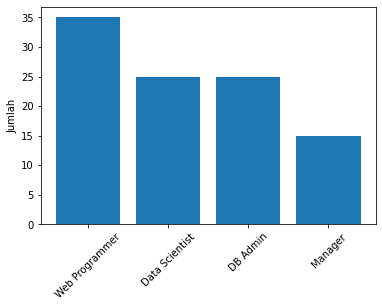

In [24]:
#contoh dengan data manual
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
x = ["Web Programmer", "Data Scientist", "DB Admin", "Manager"]

plt.bar(x,y)

plt.xticks(rotation=45)
plt.ylabel('Jumlah')
plt.show()

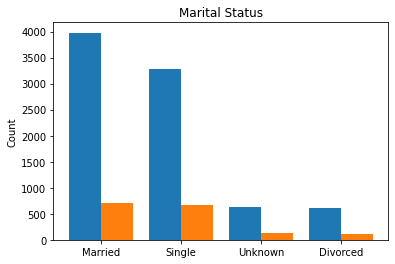

In [30]:
# versi 1 (agak susah). contoh menggunakan fungsi bar dari plt
y1 = existing_data['Marital_Status'].value_counts()
y2 = attrited_data['Marital_Status'].value_counts()


x1 = np.arange(len(y1.index))
x2 = np.arange(len(y2.index))
bar_width = 0.4

plt.bar(x1, y1, width=bar_width)
plt.bar(x2+bar_width, y2, width=bar_width)

plt.title('Marital Status')
plt.ylabel('Count')
plt.xticks(x2 + bar_width / 2, labels=df_churning.Marital_Status.unique())

plt.show() 

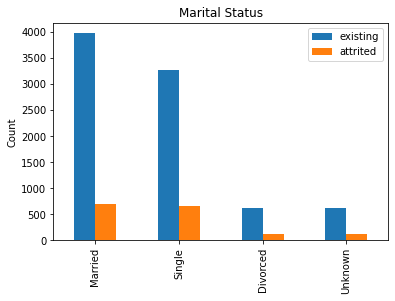

In [36]:
# versi 2 (lebih mudah). contoh menggunakan fungsi plot.bar dari object dataframe
data1 = existing_data['Marital_Status'].value_counts()
data2 = attrited_data['Marital_Status'].value_counts()

df_new = pd.concat([data1, data2],keys=['existing','attrited'], axis=1) 

#df_new.plot.bar() #bisa pakai cara 1
df_new.plot(kind='bar') # bisa pakai cara 2


plt.title('Marital Status')
plt.ylabel('Count')

plt.show() 

In [32]:
df_new

,existing,attrited
Married,3978,709
Single,3275,668
Divorced,627,121
Unknown,620,129


### stacked bar plot

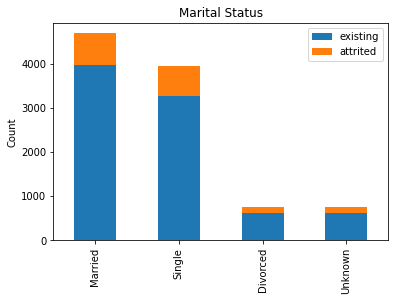

In [ ]:
# contoh menggunakan stacked bar plot
data1 = existing_data['Marital_Status'].value_counts()
data2 = attrited_data['Marital_Status'].value_counts()
df_new = pd.concat([data1, data2],keys=['existing','attrited'], axis=1) 

#df_new.plot.bar() #bisa pakai cara 1
df_new.plot(kind='bar', stacked=True) # bisa pakai cara 2
plt.title('Marital Status')
plt.ylabel('Count')
plt.show() 

In [ ]:
df_new['existing_percent'] = (df_new['existing'] / 
                  (df_new['existing'] + df_new['attrited'])) * 100
df_new['attrited_percent'] = (df_new['attrited'] / 
                  (df_new['attrited']+ df_new['existing'])) * 100
df_new

,existing,attrited,existing_percent,attrited_percent
Married,3978,709,84.873053,15.126947
Single,3275,668,83.058585,16.941415
Divorced,627,121,83.823529,16.176471
Unknown,620,129,82.777036,17.222964


### histogram

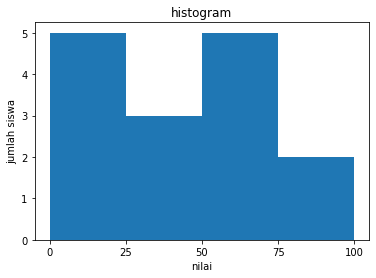

In [44]:
# dengan data manual
data = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
bins = [0,25,50,75,100]


plt.hist(data, bins = bins)
plt.title("histogram")
plt.xticks([0,25,50,75,100])
plt.xlabel('nilai')
plt.ylabel('jumlah siswa')
plt.show()

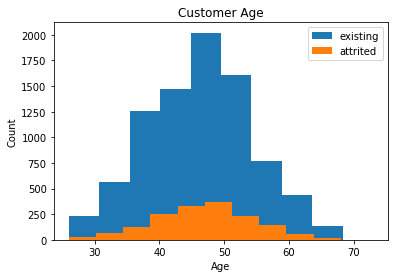

In [55]:
# versi 1. contoh menggunakan fungsi hist dari plt
data1 = existing_data['Customer_Age']
data2 = attrited_data['Customer_Age']

plt.hist(data1, label='existing')
plt.hist(data2, label='attrited')


plt.title('Customer Age')
plt.ylabel('Count')
plt.xlabel('Age')

plt.legend()
plt.show() 

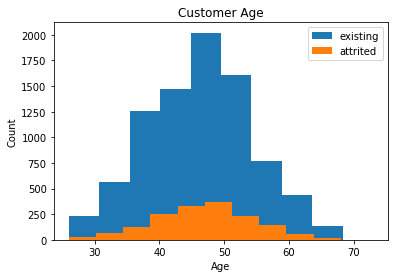

In [60]:
# versi 2. contoh menggunakan fungsi plot.hist dari object dataframe
import matplotlib.pyplot as plt

existing_data['Customer_Age'].plot.hist(label='existing')
attrited_data['Customer_Age'].plot.hist(label='attrited')
#attrited_data['Customer_Age'].plot(kind='hist') #bisa juga pakai cara ini 

plt.title('Customer Age')
plt.ylabel('Count')
plt.xlabel('Age')

plt.legend()
plt.show() 

### scatter plot

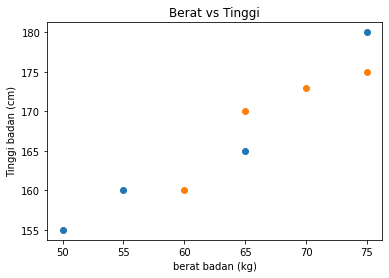

In [58]:
#data manual
berat_a = np.array([50, 65, 75, 55])
tinggi_a = np.array([155, 165, 180, 160])

berat_b = np.array([60, 75, 65, 70])
tinggi_b = np.array([160, 175, 170, 173])

plt.scatter(berat_a, tinggi_a)
plt.scatter(berat_b, tinggi_b)

plt.title('Berat vs Tinggi')
plt.ylabel('Tinggi badan (cm)')
plt.xlabel('berat badan (kg)')
plt.show() 

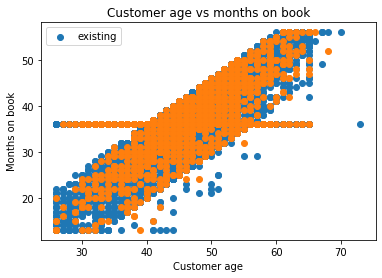

In [61]:
# versi 1. contoh menggunakan fungsi scatter dari plt
y1 = attrited_data['Months_on_book']
x1 = attrited_data['Customer_Age']

y2 = existing_data['Months_on_book']
x2 = existing_data['Customer_Age']

plt.scatter(x2, y2)
plt.scatter(x1, y1)

plt.title('Customer age vs months on book')
plt.ylabel('Months on book')
plt.xlabel('Customer age')

plt.show() 

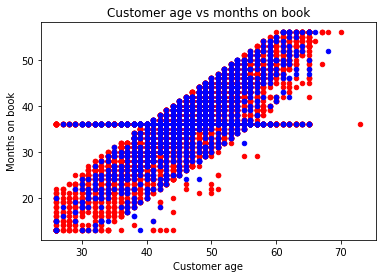

In [ ]:
# versi 2. contoh menggunakan fungsi plot.scatter dari object dataframe
ax=existing_data.plot.scatter(x='Customer_Age', y='Months_on_book', c='red')
attrited_data.plot.scatter(x='Customer_Age', y='Months_on_book', c='blue', ax=ax)

plt.title('Customer age vs months on book')
plt.ylabel('Months on book')
plt.xlabel('Customer age')
plt.show() 

### boxplot

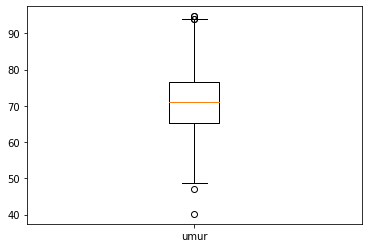

In [75]:
#contoh data manual
np.random.seed(10)
data = np.random.normal(70, 10, 200) #buat data random, rata2 70, std dev 10, jumlah data 200

plt.boxplot(data)
plt.xticks([1],labels=['umur'])
plt.show() 

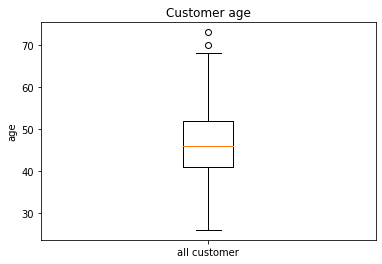

In [76]:
# versi 1. contoh menggunakan fungsi boxplot dari plt. single group.
plt.boxplot(df_churning['Customer_Age'])

plt.title('Customer age')
plt.ylabel('age')
plt.xticks([1],labels=['all customer'])
plt.show() 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


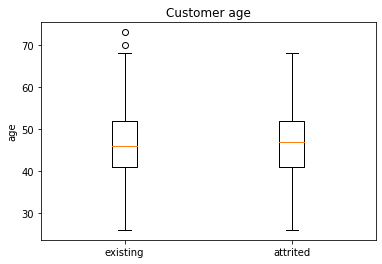

In [79]:
# versi 1. contoh menggunakan fungsi boxplot dari plt. multiple group.

data1 = existing_data['Customer_Age'].values
data2 = attrited_data['Customer_Age'].values
#buat object dictionary dahulu
my_dictionary = {'existing': data1, 'attrited': data2}
#ambil value nya
plt.boxplot(list(my_dictionary.values()))

plt.title('Customer age')
plt.ylabel('age')
plt.xticks([1,2], labels=list(my_dictionary.keys()))
plt.show() 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


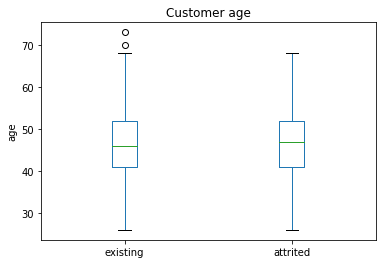

In [80]:
# versi 2. contoh menggunakan fungsi plot.box dari object dataframe
data1 = existing_data['Customer_Age']
data2 = attrited_data['Customer_Age']
df_new = pd.concat([data1, data2],keys=['existing','attrited'], axis=1) 

df_new.plot.box() #bisa pakai cara ini
#df_new.plot(kind='box') #bisa menggunakan cara ini juga

plt.title('Customer age')
plt.ylabel('age')
plt.show()

### line plot

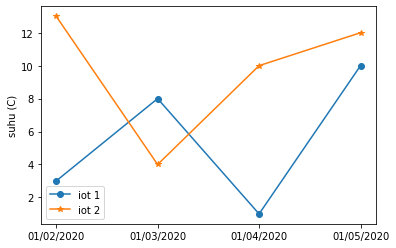

In [81]:
#dengan data manual
import matplotlib.pyplot as plt
import numpy as np

#x = np.array([1, 2, 3, 4])
x = np.array(["01/02/2020", "01/03/2020", "01/04/2020", "01/05/2020"])
y1 = np.array([3, 8, 1, 10])
y2 = np.array([13, 4, 10, 12])

plt.plot(x,y1, marker='o', label='iot 1')
plt.plot(x,y2, marker='*', label='iot 2')
plt.ylabel('suhu (C)')
plt.legend()
plt.show()

In [84]:
import pandas as pd
df_iot = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/datatraining.txt', delimiter=',')
#df_iot.head()
df_iot['date'] = pd.to_datetime(df_iot['date'])


In [89]:
df_iot.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


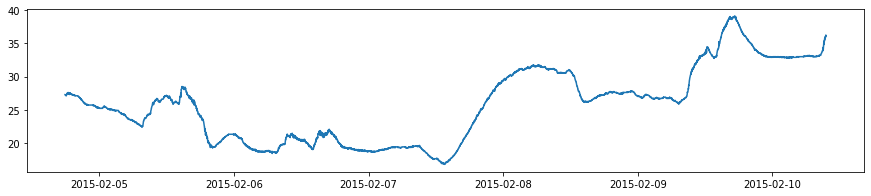

In [87]:
plt.figure(figsize=(15, 3))
plt.plot(df_iot['date'], df_iot['Humidity'])
plt.show()

### violin plot

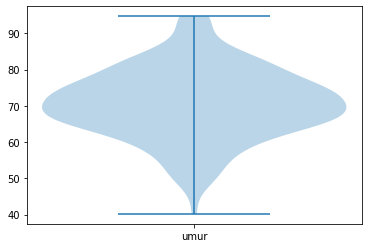

In [91]:
#contoh data manual
np.random.seed(10)
data = np.random.normal(70, 10, 200) #buat data random, rata2 70, std dev 10, jumlah data 200
plt.violinplot(data)

plt.xticks([1],labels=['umur'])
plt.show() 

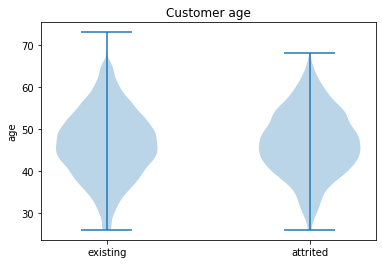

In [ ]:
# versi 1. contoh menggunakan fungsi violinplot dari plt. multiple group.

data1 = existing_data['Customer_Age'].values
data2 = attrited_data['Customer_Age'].values
#buat object dictionary dahulu
my_dictionary = {'existing': data1, 'attrited': data2}
#ambil value nya
plt.violinplot(list(my_dictionary.values()))

plt.title('Customer age')
plt.ylabel('age')
plt.xticks([1,2], labels=list(my_dictionary.keys()))
plt.show() 

## Sub plot

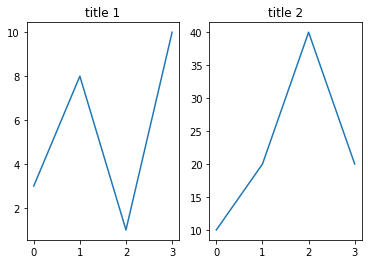

In [92]:
#versi 1
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1) #1 baris, 2 kolom, dan plot ini adalah plot pertama.
plt.plot(x,y)
plt.title('title 1')

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 40, 20])

plt.subplot(1, 2, 2) #1 baris, 2 kolom, dan plot ini adalah plot kedua.
plt.plot(x,y)
plt.title('title 2')

plt.show()

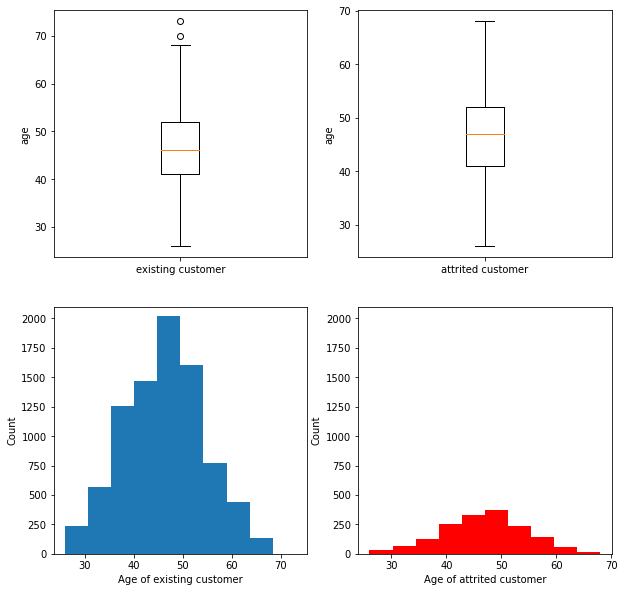

In [93]:
#versi 1
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1) #2 baris, 2 kolom, plot 1
plt.boxplot(existing_data['Customer_Age'])
plt.ylabel('age')
plt.xticks([1],labels=['existing customer'])

plt.subplot(2, 2, 2)
plt.boxplot(attrited_data['Customer_Age'])
plt.ylabel('age')
plt.xticks([1],labels=['attrited customer'])

plt.subplot(2, 2, 3)
existing_data['Customer_Age'].plot.hist()
plt.ylabel('Count')
plt.xlabel('Age of existing customer')
plt.ylim([0, 2100])

plt.subplot(2, 2, 4)
attrited_data['Customer_Age'].plot.hist(color='r')
plt.ylabel('Count')
plt.xlabel('Age of attrited customer')
plt.ylim([0, 2100])

plt.show() 

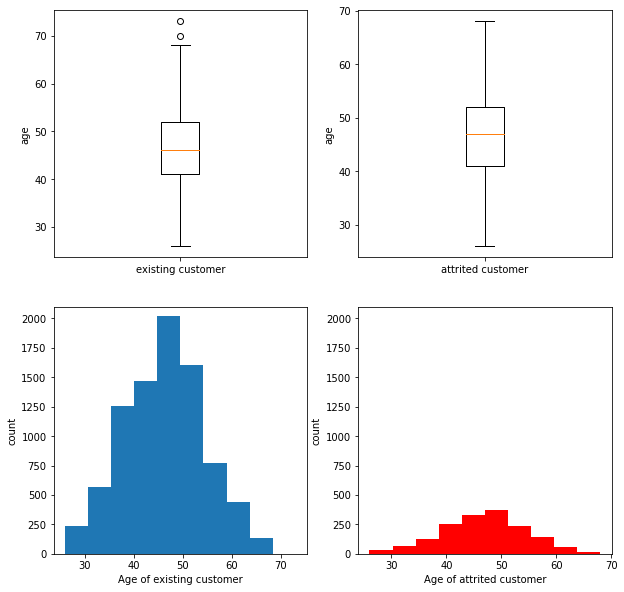

In [108]:
#versi 2 
fig, ax = plt.subplots(2,2, figsize=(10, 10))

ax[0,0].boxplot(existing_data['Customer_Age'])
ax[0,0].set_ylabel('age')
ax[0,0].set_xticklabels(['existing customer'])

ax[0,1].boxplot(attrited_data['Customer_Age'])
ax[0,1].set_ylabel('age')
ax[0,1].set_xticklabels(['attrited customer'])


data1 = existing_data['Customer_Age']
data2 = attrited_data['Customer_Age']

ax[1,0].hist(data1)
ax[1,0].set_xlabel('Age of existing customer')
ax[1,0].set_ylabel('count')
ax[1,0].set_ylim([0, 2100])

ax[1,1].hist(data2, color='r')
ax[1,1].set_xlabel('Age of attrited customer')
ax[1,1].set_ylabel('count')
ax[1,1].set_ylim([0, 2100])

plt.show() 

## Annotation

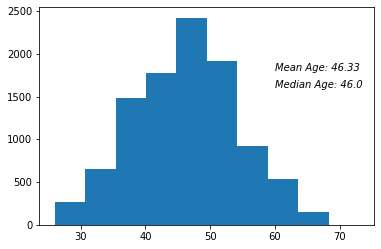

In [103]:
# Show the distribution of a data and its measure of central tendency
data = df_churning['Customer_Age']
plt.hist(data)

plt.text(60, 1600, "Median Age: " + str(round(data.median(),2)), 
        style = 'italic', fontsize=10)
plt.text(60, 1800, "Mean Age: " + str(round(data.mean(),2)), 
        style = 'italic', fontsize=10)
plt.show()

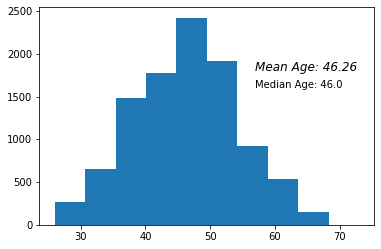

In [ ]:
fig, ax = plt.subplots()
ax.hist(data)

plt.annotate("Median Age: " + str(round(data1.median(),2)),xy=(57, 1600))
plt.annotate("Mean Age: " + str(round(data1.mean(),2)), xy=(57, 1800), style = 'italic', fontsize=12)
plt.show()

## Axis 

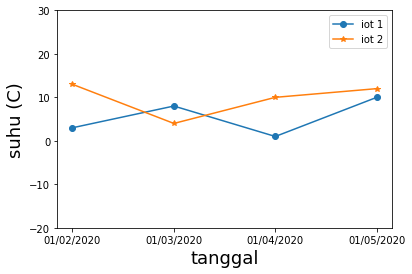

In [106]:
import matplotlib.pyplot as plt
import numpy as np

#x = np.array([1, 2, 3, 4])
x = np.array(["01/02/2020", "01/03/2020", "01/04/2020", "01/05/2020"])
y1 = np.array([3, 8, 1, 10])
y2 = np.array([13, 4, 10, 12])

plt.plot(x,y1, marker='o', label='iot 1')
plt.plot(x,y2, marker='*', label='iot 2')
plt.legend()

# set label
plt.ylabel('suhu (C)', fontsize=18) # buat label untuk sumbu y
plt.xlabel('tanggal', fontsize=18) # buat label untuk sumbu x

#set axis range
plt.ylim([-20,30])
plt.show()

## Legend

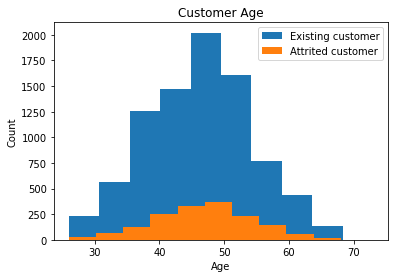

In [109]:

data1 = existing_data['Customer_Age']
data2 = attrited_data['Customer_Age']

plt.hist(data1, label='Existing customer') # pertama, set label dulu
plt.hist(data2, label='Attrited customer')

plt.title('Customer Age')
plt.ylabel('Count')
plt.xlabel('Age')

plt.legend() # kedua, panggil fungsi legend
plt.show() 

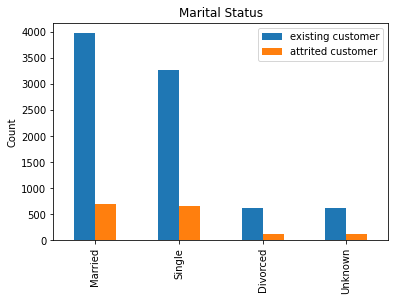

In [111]:
data1 = existing_data['Marital_Status'].value_counts()
data2 = attrited_data['Marital_Status'].value_counts()
df_new = pd.concat([data1, data2],keys=['existing customer','attrited customer'], axis=1) 

#df_new.plot.bar() #bisa pakai cara 1
df_new.plot(kind='bar') # bisa pakai cara 2
plt.title('Marital Status')
plt.ylabel('Count')
#plt.legend() # sudah otomatis, tidak perlu dipanggil. 
plt.show() 

## Summary

4 Pilar dalam data visualization

- Distribution = kemungkinan terjadinya suatu hasil. Contoh : histogram, scatter
- Relationship = hubungan antara dua variabel atau lebih. Contoh : scatter
- Comparison = membandingkan multiple categories dalam single variable. Contoh : barplot, line plot
- Composition = menunjukkan komposisi satu atau lebih variabel. Contoh : pie chart, stacked bar

